The geodata is provided by © OpenStreetMap contributors and is made available here under the Open Database License (ODbL).



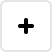
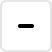
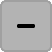
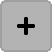
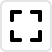
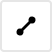
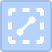
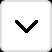
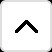
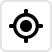
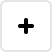
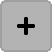
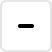
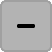
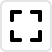
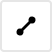
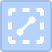
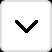
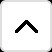
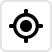

In [1]:
import geopandas as gpd
from lets_plot import *
from lets_plot.geo_data import *

LetsPlot.setup_html()

In [2]:
def get_naturalearth_data(data_type="admin_0_countries", columns=["NAME", "geometry"]):
    import shapefile
    from shapely.geometry import shape

    naturalearth_url = "https://raw.githubusercontent.com/JetBrains/lets-plot-docs/master/" + \
                       "data/naturalearth/{0}/data.shp?raw=true".format(data_type)
    sf = shapefile.Reader(naturalearth_url)

    gdf = gpd.GeoDataFrame(
        [
            dict(zip([field[0] for field in sf.fields[1:]], record))
            for record in sf.records()
        ],
        geometry=[shape(s) for s in sf.shapes()]
    )[columns]
    gdf.columns = [col.lower() for col in gdf.columns]

    return gdf

In [3]:
offices = [
    ["Prague", "CZ", "Headquarters", 100],
    ["Petersburg", "Russia", "R&D Center", 1000],
    ["Moscow", "Russia", "R&D Center", 100],
    ["Novosibirsk", "Russia", "R&D Center", 50],
    ["München", "Germany", "R&D Center", 200],
    ["Amsterdam", "Netherlands", "R&D Center", 100],
    ["Boston", "US", "R&D Center", 10],
    ["Marlton", "US", "Sales", 10],
    ["Foster City", "US", "Sales", 10],
]

dat = dict(
    city=[o[0] for o in offices],
    country=[o[1] for o in offices],
    kind=[o[2] for o in offices],
    size=[o[3] for o in offices],
)

# %%

# Geocoding
city_geocoder = geocode_cities(dat['city']).countries(dat['country'])

# %%

# The map of JetBrains major offices worldwide.
p = (ggplot(dat) +
     # geom_livemap() +
     geom_point(
         # aes(color='kind', shape='kind', size='size'),
         aes(color='kind'),
         size=10,
         map_join = [['city'], ['city']],
         #map=city_geocoder))
         map=city_geocoder.get_centroids()))

p.show()

In [4]:
gpd.datasets.available

[]

In [5]:
world = get_naturalearth_data(columns=["NAME", "geometry", "CONTINENT"])
print(world.size)
world[100:120]

531


name                                           geometry continent
100        Bhutan  POLYGON ((91.69666 27.77174, 92.10371 27.45261...      Asia
101         Nepal  POLYGON ((88.12044 27.87654, 88.04313 27.44582...      Asia
102      Pakistan  POLYGON ((77.83745 35.49401, 76.87172 34.65354...      Asia
103   Afghanistan  POLYGON ((66.51861 37.36278, 67.07578 37.35614...      Asia
104    Tajikistan  POLYGON ((67.83 37.14499, 68.39203 38.15703, 6...      Asia
105    Kyrgyzstan  POLYGON ((70.96231 42.26615, 71.18628 42.70429...      Asia
106  Turkmenistan  POLYGON ((52.50246 41.78332, 52.94429 42.11603...      Asia
107          Iran  POLYGON ((48.56797 29.92678, 48.01457 30.45246...      Asia
108         Syria  POLYGON ((35.71992 32.70919, 35.7008 32.71601,...      Asia
109       Armenia  POLYGON ((46.50572 38.77061, 46.14362 38.7412,...      Asia
110        Sweden  POLYGON ((11.02737 58.85615, 11.46827 59.43239...    Europe
111       Belarus  POLYGON ((28.17671 56.16913, 29.22951 55.91834...    Europe
112        Poland  POLYGON ((23.48413 53.9125, 23.52754 53.47012,...    Europe
113       Austria  POLYGON ((16.97967 48.1235, 16.90375 47.71487,...    Europe
114       Hungary  POLYGON ((22.08561 48.42226, 22.64082 48.15024...    Europe
115       Moldova  POLYGON ((26.61934 48.22073, 26.85782 48.36821...    Europe
116       Romania  POLYGON ((28.23355 45.48828, 28.67978 45.30403...    Europe
117     Lithuania  POLYGON ((26.49433 55.61511, 26.58828 55.16718...    Europe
118        Latvia  POLYGON ((27.28818 57.47453, 27.77002 57.24426...    Europe
119       Estonia  POLYGON ((27.98113 59.47537, 27.98112 59.47537...    Europe

In [6]:
ggplot() + geom_polygon(aes(fill='continent'), data=world) + ggsize(800, 400)

In [7]:
ggplot() + geom_map(data=world)

In [8]:
ggplot() + geom_polygon(map=world)

In [9]:
ggplot() + geom_map(map=world)

In [10]:
ggplot() + geom_rect(map=world, alpha=.3)

In [11]:
cities = get_naturalearth_data(data_type='populated_places')
cities

name                     geometry
0      Vatican City    POINT (12.45339 41.90328)
1        San Marino     POINT (12.44177 43.9361)
2             Vaduz     POINT (9.51667 47.13372)
3           Lobamba       POINT (31.2 -26.46667)
4        Luxembourg        POINT (6.13 49.61166)
..              ...                          ...
238  Rio de Janeiro  POINT (-43.21212 -22.90731)
239       São Paulo  POINT (-46.62697 -23.55673)
240          Sydney  POINT (151.21255 -33.87137)
241       Singapore    POINT (103.85387 1.29498)
242       Hong Kong   POINT (114.18306 22.30693)

[243 rows x 2 columns]

In [12]:
ggplot() + geom_point(data=cities)

In [13]:
ggplot() + geom_point(map=cities)

In [14]:
import numpy as np
cityNames = cities['name'].tolist()
cityValue = np.random.randint(10, 100, len(cityNames))
cityData = dict(city=cityNames, val=cityValue)
ggplot() + geom_point(aes(color='val'), data=cityData, map=cities, map_join=('city', 'name'), size=7)

In [15]:
citiesWithKey = cities.rename(columns = {'name':'key'}, inplace = False)
citiesWithKey

key                     geometry
0      Vatican City    POINT (12.45339 41.90328)
1        San Marino     POINT (12.44177 43.9361)
2             Vaduz     POINT (9.51667 47.13372)
3           Lobamba       POINT (31.2 -26.46667)
4        Luxembourg        POINT (6.13 49.61166)
..              ...                          ...
238  Rio de Janeiro  POINT (-43.21212 -22.90731)
239       São Paulo  POINT (-46.62697 -23.55673)
240          Sydney  POINT (151.21255 -33.87137)
241       Singapore    POINT (103.85387 1.29498)
242       Hong Kong   POINT (114.18306 22.30693)

[243 rows x 2 columns]

In [16]:
ggplot() + geom_point(aes(color='val'), data=cityData, map=citiesWithKey, map_join=('city', 'key'), size=7)

In [17]:
ggplot() + ggsize(800, 400)\
+ geom_polygon(aes(fill='continent'), data=world)\
+ geom_point(data=cities, color='cyan')

In [18]:
ggplot() + ggsize(800, 400)\
+ geom_rect(aes(fill='continent'), data=world)\
+ geom_point(data=cities, color='cyan', size=7, alpha=.5)